In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Business Problem :

Analysis of the Churn for bank customers in order to visualise and identify the features that are impacting the decision of every customers to leave the bank.


# 2. Data Acquisition :

# 2.1. Content of the dataset

The dataset is provided and it consists of the following Rows:

* **RowNumber**—corresponds to the record (row) number and has no effect on the output.
 
* **CustomerId**—contains random values and has no effect on customer leaving the bank.

* **Surname**—the surname of a customer has no impact on their decision to leave the bank.

* **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

* **Geography**—a customer’s location can affect their decision to leave the bank.

* **Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

* **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

* **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

* **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

* **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.

* **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank

* **IsActiveMember**—active customers are less likely to leave the bank.

* **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

* **Exited**—whether or not the customer left the bank.

Acknowledgements
As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.



# 3. Data Preparation

The data seems to be clean already but we need to confirm it


## 3.1. Information about the dataset


### 3.1.1. Loading the data

In [2]:
data = pd.read_csv("churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3.1.2. Shape and info

In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset has 0 non null values, 3 dtypes 2 floats, 9 integers and 3 Object.

### 3.1.3. Label and features

In [5]:
label = 'Exited'
features = data.columns.tolist()
features.remove(label)

In [6]:
label

'Exited'

In [7]:
features

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

### 3.1.4. Numerical and categorical columns

> At first let us retrieve the numerical and categorical columns using their dtypes

In [20]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()

In [21]:
numerical_columns

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [22]:
# First remove the label from categorical_columns
numerical_columns.remove(label)

In [23]:
categorical_columns

['Surname', 'Geography', 'Gender']

> !!! Ofcourse a categorical_columns can be a number:
> - Let us count the number of distinct observation of each columns to see what item can be a categorical

In [24]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

> - If a column has under 15 distincts values it seems it is more valuable as a categorical

In [25]:
numerical_to_categorize = data[numerical_columns].nunique()[data[numerical_columns].nunique() < 15].index.tolist()

In [26]:
numerical_to_categorize

['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

> Now let us have a look to our numerical_columns and categorical_columns

In [28]:
# first we remove the numerical columns that has to be on categorical columns
for elt in numerical_columns:
    if elt in numerical_to_categorize:
        numerical_columns.remove(elt)
        
# Then we display the numerical columns
numerical_columns

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [29]:
# Just in case we run this cell multiple times we test if it has still 3 before adding the new numerical_to_categorize
if len(categorical_columns)==3:
    categorical_columns = categorical_columns + numerical_to_categorize

# Then we display the final categorical columns
categorical_columns

['Surname',
 'Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

## 3.2. Handling missing Values

In [30]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

> No missing Values as expected.

# 3.3. Deal with Outliers

We will use the items above the 99% quantile and under 1% quantile to identify outliers

# Visualisation of outliers:


### 3.3.1. Numerical_features

>- Let us use boxplots and histogram to visualise outliers

In [153]:
data.plot?

0 RowNumber
1 CustomerId
2 CreditScore
3 Age
4 Balance
5 EstimatedSalary


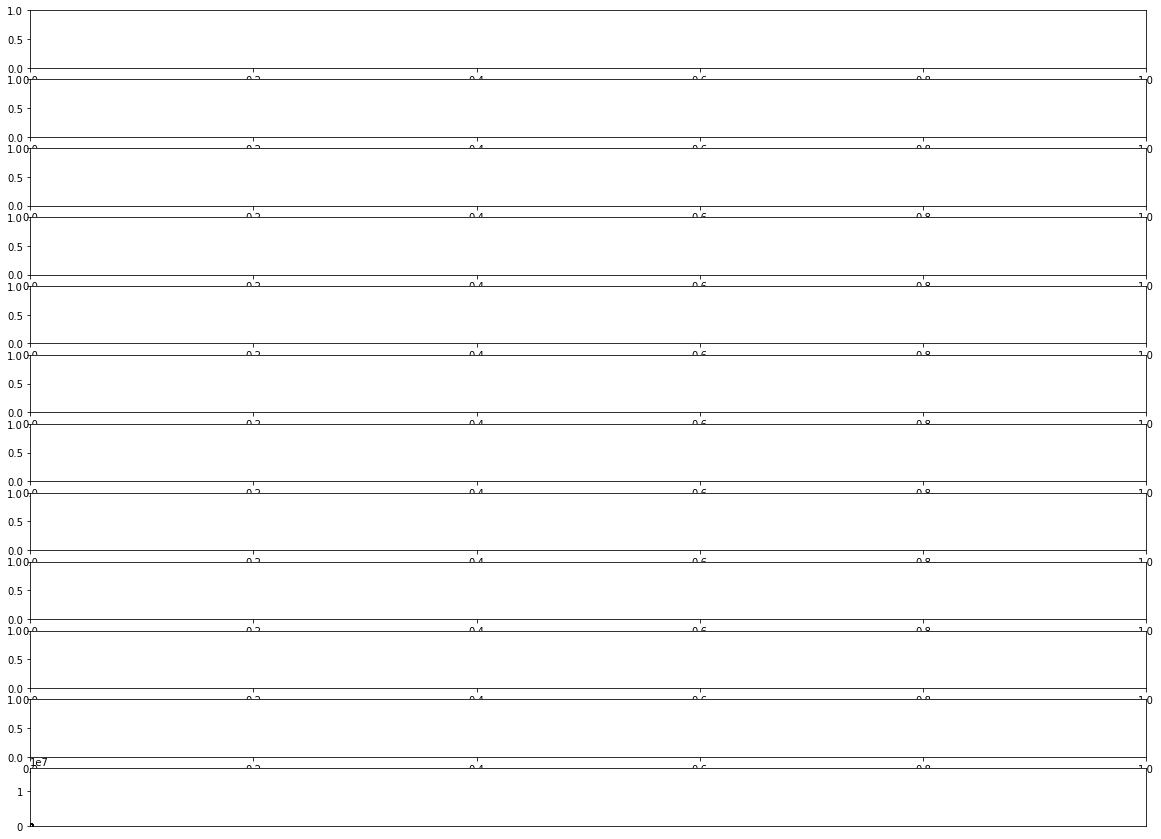

In [172]:
fig, ax = plt.subplots(12,1, figsize = (20, 15))
for count, elt in enumerate(numerical_columns):
    print(count, elt)
    plt.boxplot(data[elt])
    plt.hist(data[elt])
        
plt.show()

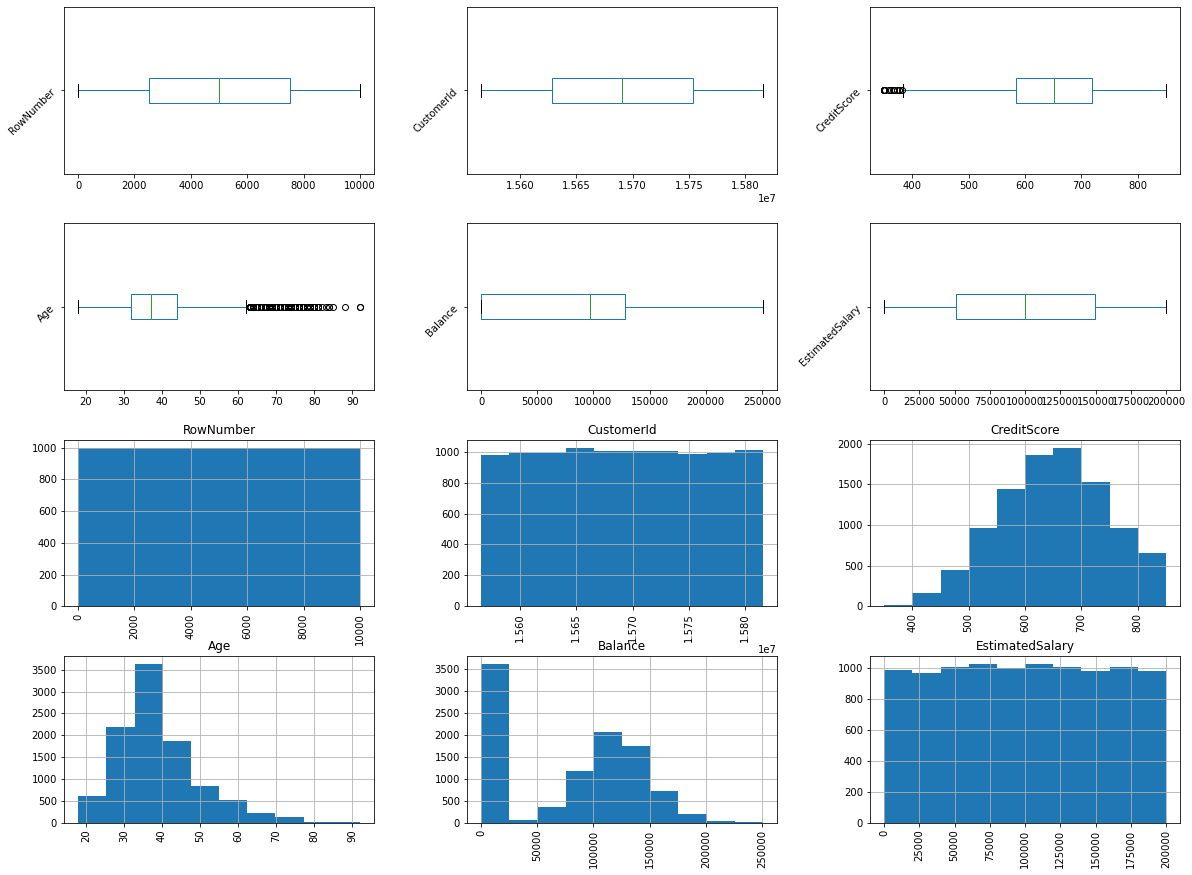

In [155]:
# Create a figure of 2 subplots ax1 and ax2 that is 2 rows 1 columns
fig , ax = plt.subplots(4,3, figsize=(20, 15))
data[numerical_columns].plot.box(ax = ax[0:2,0:3], subplots = True, vert= False, rot = 45)
data[numerical_columns].hist(ax = ax[2:4,0:3], xrot = 90)
plt.show()